<h1>Visualizing Errors</h1>

In [1]:
# In visualization of data and results, showing these errors effectively can make plot convey complete information.

<h3>Basic Errorbars</h3>

In [3]:
# A basic error bar can be created with a single matplotlib function call

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/var/folders/c8/z4lh2j2s5kq5jvv28mrv0rw40000gn/T/ipykernel_39271/1993102864.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


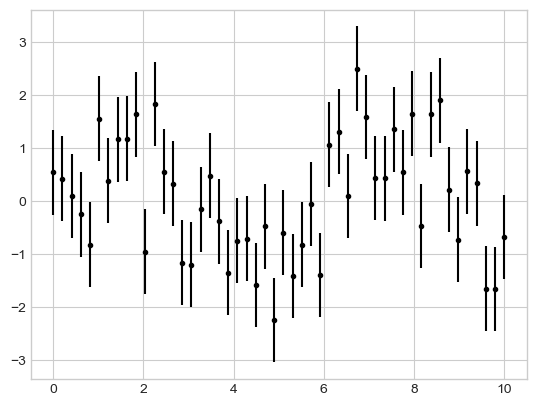

In [5]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x,y, yerr=dy,fmt='.k');

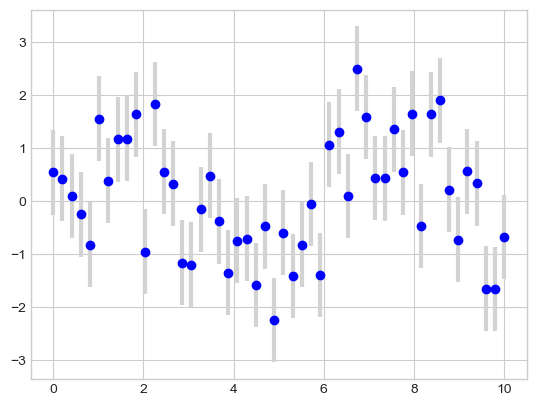

In [6]:
# Here fmt is format code controlling the lines and points and has the same syntax as the shorthand used 
# in plt.plot

# The errorbar function has many options to finetune the outputs
plt.errorbar(x, y, yerr=dy, fmt='o', color='blue',ecolor='lightgray',elinewidth=3,capsize=0);

<h3>Continuous Errors</h3>

In [16]:
# In some situations, it is desirable to show errorbars on continuous quantities. 

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

# compute the gaussian process fit
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train, y_train)
gp.kernel_

5.02**2 * RBF(length_scale=1.43)

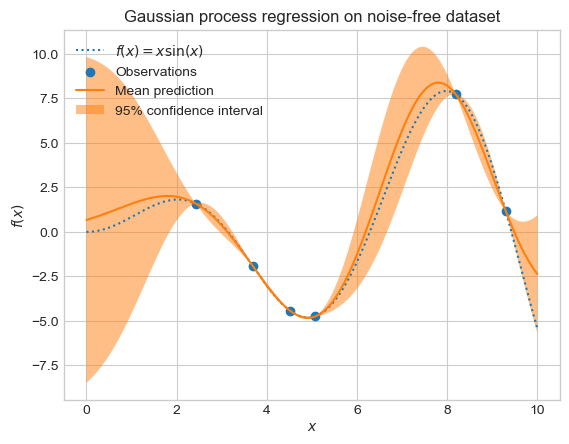

In [17]:
mean_prediction, std_prediction = gp.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

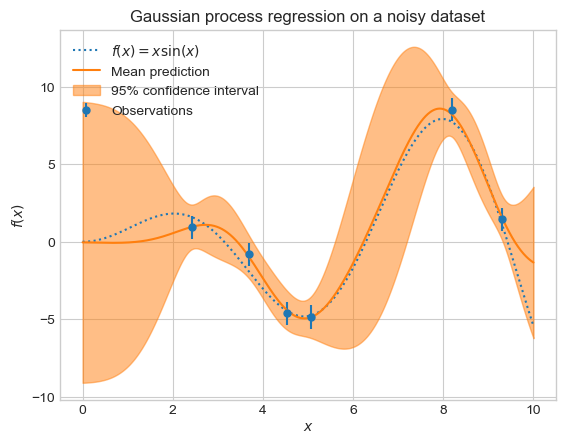

In [19]:
# With nose targets

noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

gp = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gp.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gp.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")